# Gun Violence Data - Time Series Analysis
### Time series analysis for Gun Violence Data (2013-2018)

#### This script contains the following:
1. Importing your libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing for Gun Violence Data
6. Final Analysis

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
#define path
path=r'/Users/yeji/Documents/Career Foundry/Achievement 6/Gun Violence Record Data Analysis'

In [3]:
# Import data
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'data_with_regions.csv'), index_col = 0)

In [4]:
#check head
df.head()

,incident_id,date,year,month,day,state,city_or_county,n_killed,n_injured,Regions
0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,0,4,Northeast
1,460726,2013-01-01,2013,1,1,California,Hawthorne,1,3,West
2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1,3,Midwest
3,478925,2013-01-05,2013,1,5,Colorado,Aurora,4,0,West
4,478959,2013-01-07,2013,1,7,North Carolina,Greensboro,2,2,South


In [5]:
#check shape
df.shape

(239677, 10)

### Subsetting, wrangling and cleaning data

In [6]:
#combine month and year to create new dataframe
df['incident_year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
print(df['incident_year_month'])

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2013-01-01
4        2013-01-01
            ...    
239672   2018-03-01
239673   2018-03-01
239674   2018-03-01
239675   2018-03-01
239676   2018-03-01
Name: incident_year_month, Length: 239677, dtype: datetime64[ns]


In [7]:
#create subset with incident_year_month and value counts
df_sub = df['incident_year_month'].value_counts().rename_axis('incident_date').reset_index(name='incident_counts')
print (df_sub)

   incident_date  incident_counts
0     2017-05-01             5666
1     2017-04-01             5577
2     2017-07-01             5547
3     2016-08-01             5527
4     2014-08-01             5259
..           ...              ...
58    2013-12-01               22
59    2013-03-01               19
60    2013-04-01               17
61    2013-01-01               15
62    2013-02-01               12

[63 rows x 2 columns]


In [8]:
#create subset without data from 2013 and 2018 because there is lack of total data for each year
df_sub2 = df_sub.loc[(df_sub['incident_date'] >= '2014-01-01') & (df_sub['incident_date'] < '2018-01-01')]

In [9]:
df_sub2.shape

(48, 2)

In [10]:
df_sub2.head()

,incident_date,incident_counts
0,2017-05-01,5666
1,2017-04-01,5577
2,2017-07-01,5547
3,2016-08-01,5527
4,2014-08-01,5259


#### Subset reasoning
Subset was created to create a new dataframe containing only the incident dates and counts of each incident per month/year. Also, data from 2013 and 2018 were removed because in 2013, not all incidents were recorded and in 2018, there is only records up to March. 


In [11]:
# Check for missing values
df_sub2.isnull().sum() 

incident_date      0
incident_counts    0
dtype: int64

In [12]:
# Check for duplicates
dups = df_sub2.duplicated()
dups.sum()

0

In [13]:
#change subset to datetime 

df_sub2['datetime'] = pd.to_datetime(df_sub2['incident_date']) 
df_sub2 = df_sub2.set_index('datetime')
df_sub2.drop(['incident_date'], axis=1, inplace=True) 
df_sub2.head()

,incident_counts
datetime,
2017-05-01,5666
2017-04-01,5577
2017-07-01,5547
2016-08-01,5527
2014-08-01,5259


In [14]:
#sort data ascending date
df_sub2.sort_values(by='datetime',inplace=True)
print(df_sub2)

            incident_counts
datetime                   
2014-01-01             4395
2014-02-01             3045
2014-03-01             3669
2014-04-01             3891
2014-05-01             4320
2014-06-01             4440
2014-07-01             5219
2014-08-01             5259
2014-09-01             5052
2014-10-01             4915
2014-11-01             3795
2014-12-01             3854
2015-01-01             3907
2015-02-01             3108
2015-03-01             4314
2015-04-01             4471
2015-05-01             5015
2015-06-01             4596
2015-07-01             5076
2015-08-01             5024
2015-09-01             4849
2015-10-01             4502
2015-11-01             4262
2015-12-01             4455
2016-01-01             4590
2016-02-01             3967
2016-03-01             4892
2016-04-01             4672
2016-05-01             4902
2016-06-01             4530
2016-07-01             5250
2016-08-01             5527
2016-09-01             4937
2016-10-01          

In [15]:
df_sub2.shape

(48, 1)

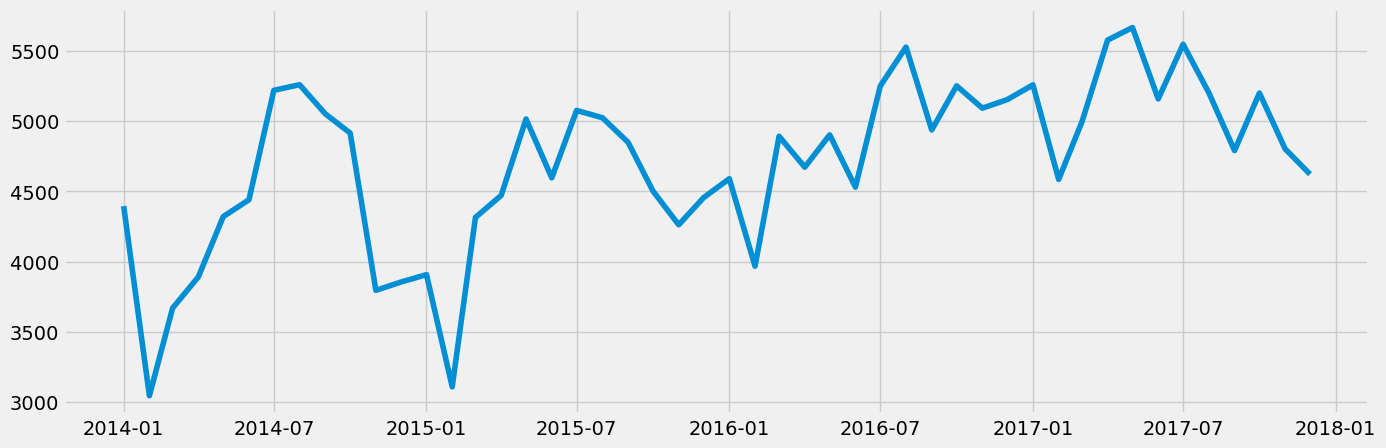

In [16]:
#plot data using matplotlib
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub2)

In [17]:
#smooth data using moving avg
df_sub2['incident_sma']=df_sub2['incident_counts'].rolling(5).mean()

In [18]:
df_sub2.head()

,incident_counts,incident_sma
datetime,,
2014-01-01,4395,NaN
2014-02-01,3045,NaN
2014-03-01,3669,NaN
2014-04-01,3891,NaN
2014-05-01,4320,3864.0


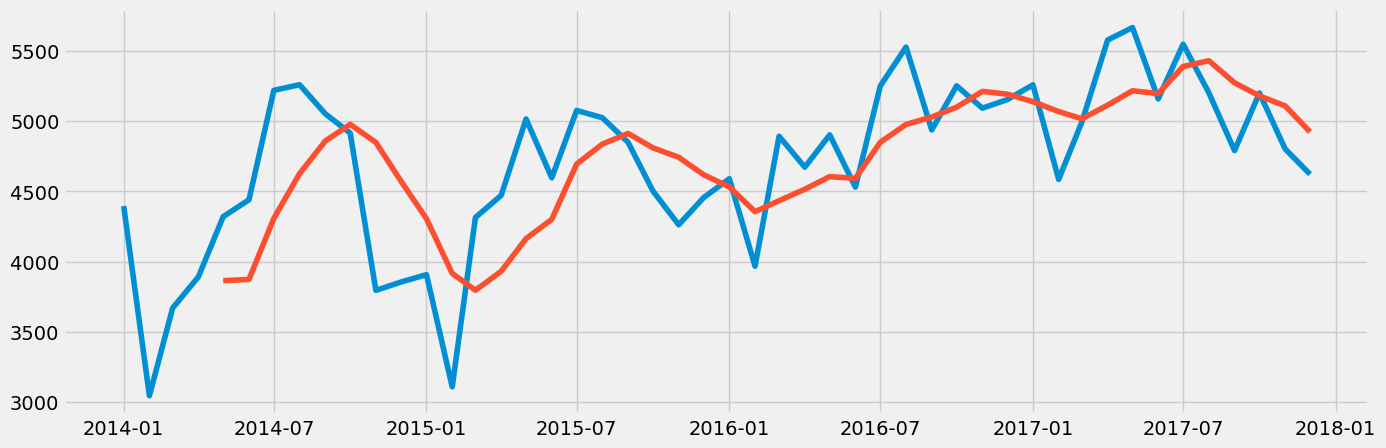

In [19]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub2)

In [20]:
#new dataset with datetime and sma 
df_new = df_sub2.drop('incident_counts', axis=1)

In [21]:
df_new.head()

,incident_sma
datetime,
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,NaN
2014-05-01,3864.0


In [22]:
#drop missing values
df_sub3 = df_new.dropna()

In [23]:
df_sub3.head()

,incident_sma
datetime,
2014-05-01,3864.0
2014-06-01,3873.0
2014-07-01,4307.8
2014-08-01,4625.8
2014-09-01,4858.0


### Time-series decomposition

In [24]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_sub3, model='additive')

In [25]:
#define fixed size for the charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

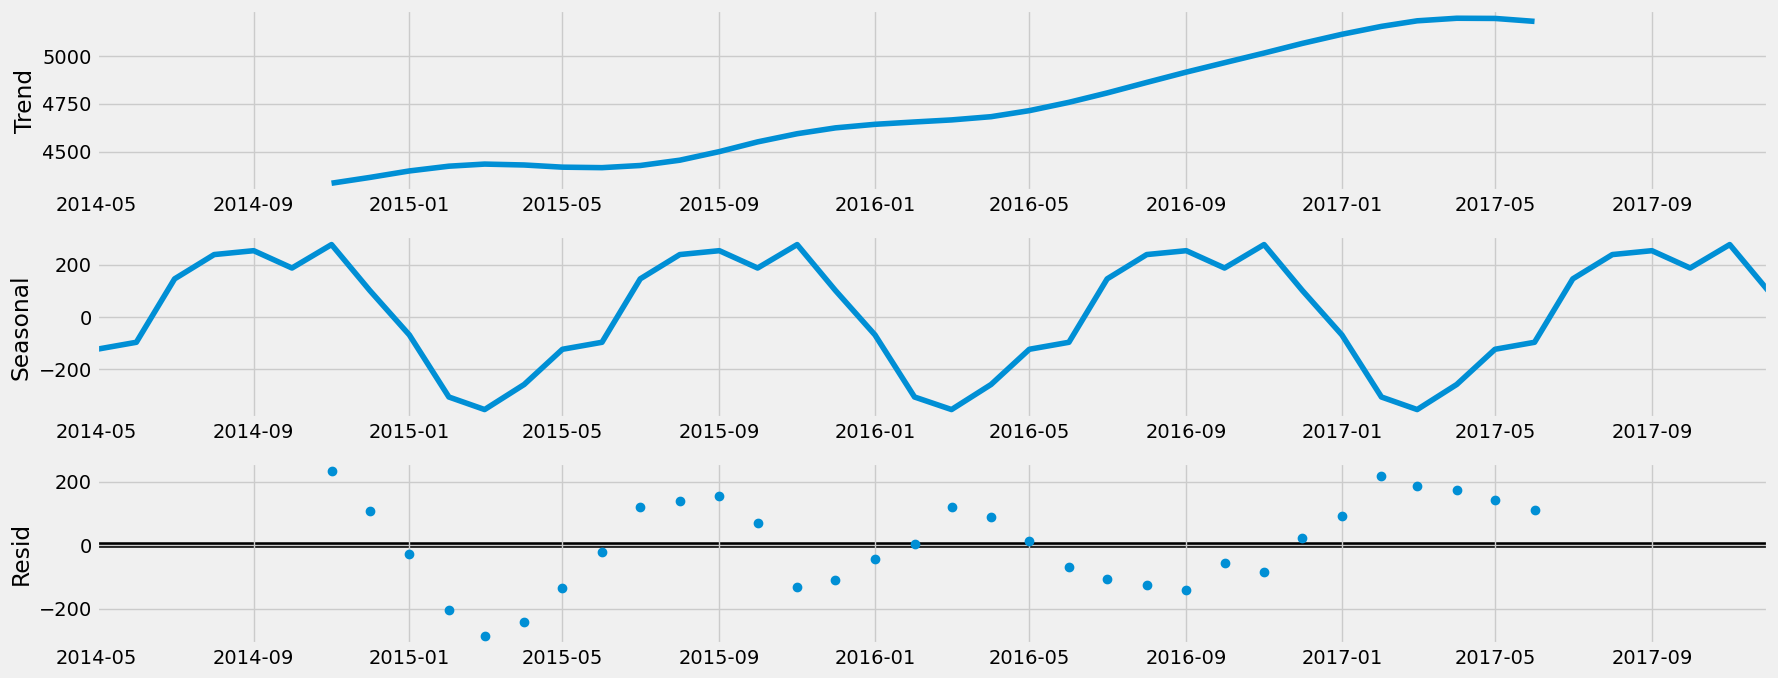

In [26]:
# Plot the separate components
decomposition.plot(())
plt.show()

### Analysis
The decomposition shows that trend line increases, which means more incidents occured throughout the year
The second part shows that there is a seasonality that plays role in the data with the increase from May to September and decline towards January.
The last part shows noise which could mean that there was another factor that could've played a role in the data as well. 

### Stationarity testing

In [27]:
#import adfuller function and perform dickey fuller test

from statsmodels.tsa.stattools import adfuller 
def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub3['incident_sma'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.837272
p-value                         0.807928
Number of Lags Used            10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


#### Analysis
The test statistic value is extremely larger than both critical values at 5% and 10% therefore null hypthosis cannot be rejected and it is not stationary 

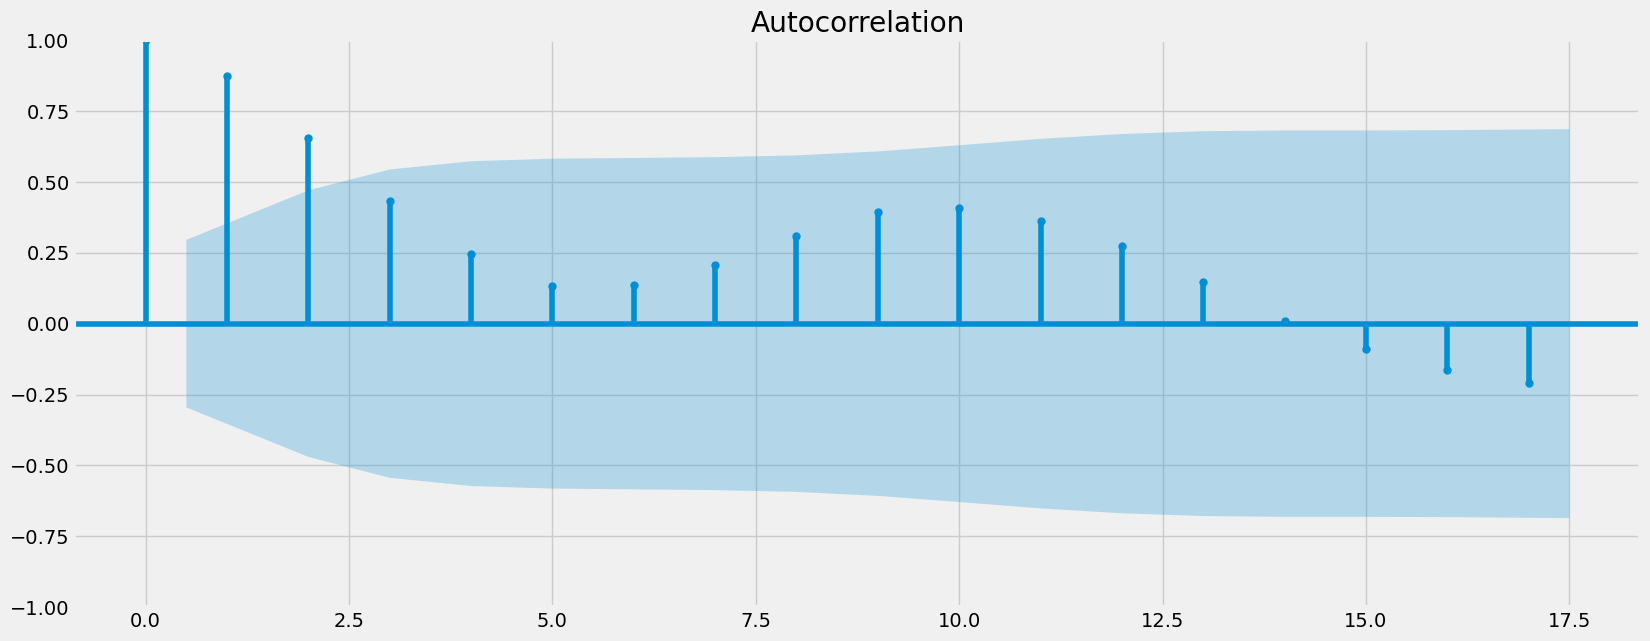

In [28]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_sub3)
plt.show()

#### Analysis
The autocorrelation shows there are 3 lags above the confidence level, which is less than a rule of thumb of having at least 10 lags to do a round of differencing. However, since the dickey fuller test shows larger value in the test statistic, differencing would be necessary.

### Stationarizing

In [29]:
#conduct differencing
df_diff = df_sub3 - df_sub3.shift(1)

In [30]:
#drop missing values 
df_diff.dropna(inplace = True) 

In [31]:
#check head
df_diff.head()

,incident_sma
datetime,
2014-06-01,9.0
2014-07-01,434.8
2014-08-01,318.0
2014-09-01,232.2
2014-10-01,119.0


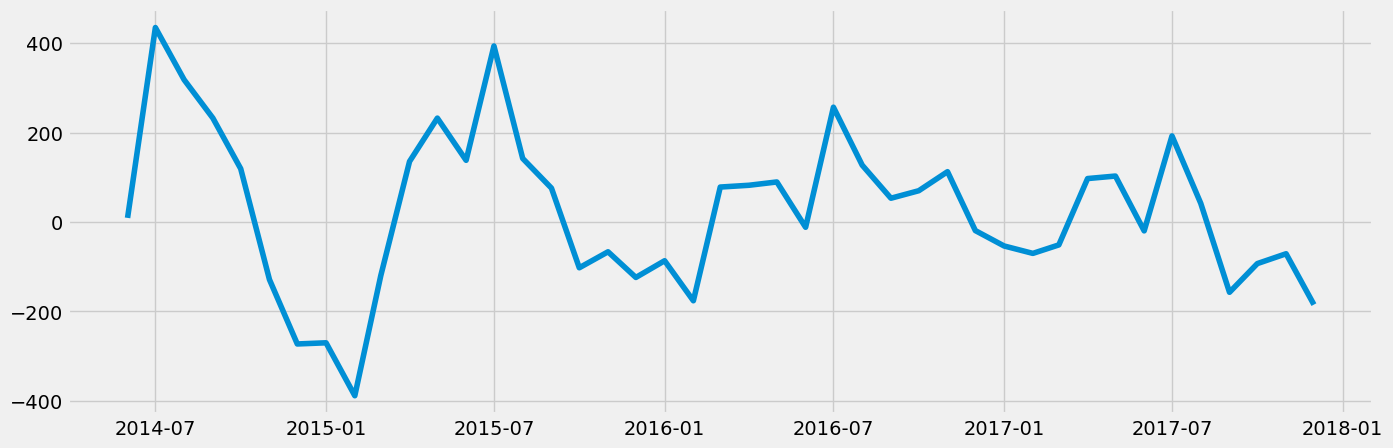

In [32]:
# Check time series curve of differentiated data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [33]:
#perform dickey fuller test on df_diff
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.802601
p-value                         0.057903
Number of Lags Used            10.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


#### Analysis
The Dickey-fuller test showed that test statistic is still higher than the critical values, so another round of differentiating is necessary

In [34]:
#2nd round of differentiating
df_diff2 = df_diff - df_diff.shift(1)

In [35]:
#drop missing values for second differentiating
df_diff2.dropna(inplace = True) 

In [36]:
#check head
df_diff2.head()

,incident_sma
datetime,
2014-07-01,425.8
2014-08-01,-116.8
2014-09-01,-85.8
2014-10-01,-113.2
2014-11-01,-248.0


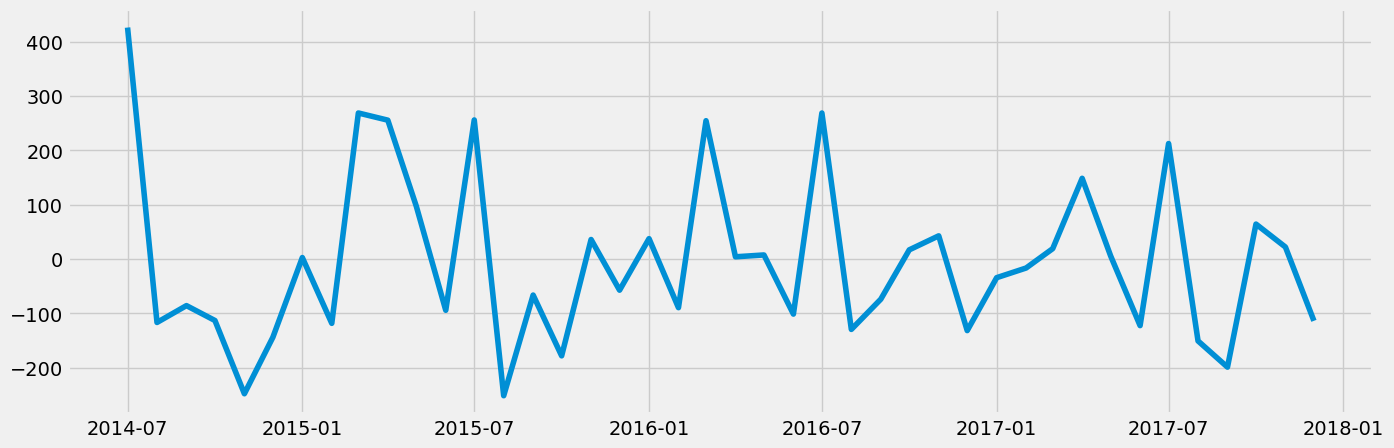

In [37]:
# Check time series curve of second differentiated data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff2)

In [38]:
#perform dickey fuller test on df_diff2
dickey_fuller(df_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.584136
p-value                         0.000138
Number of Lags Used            10.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


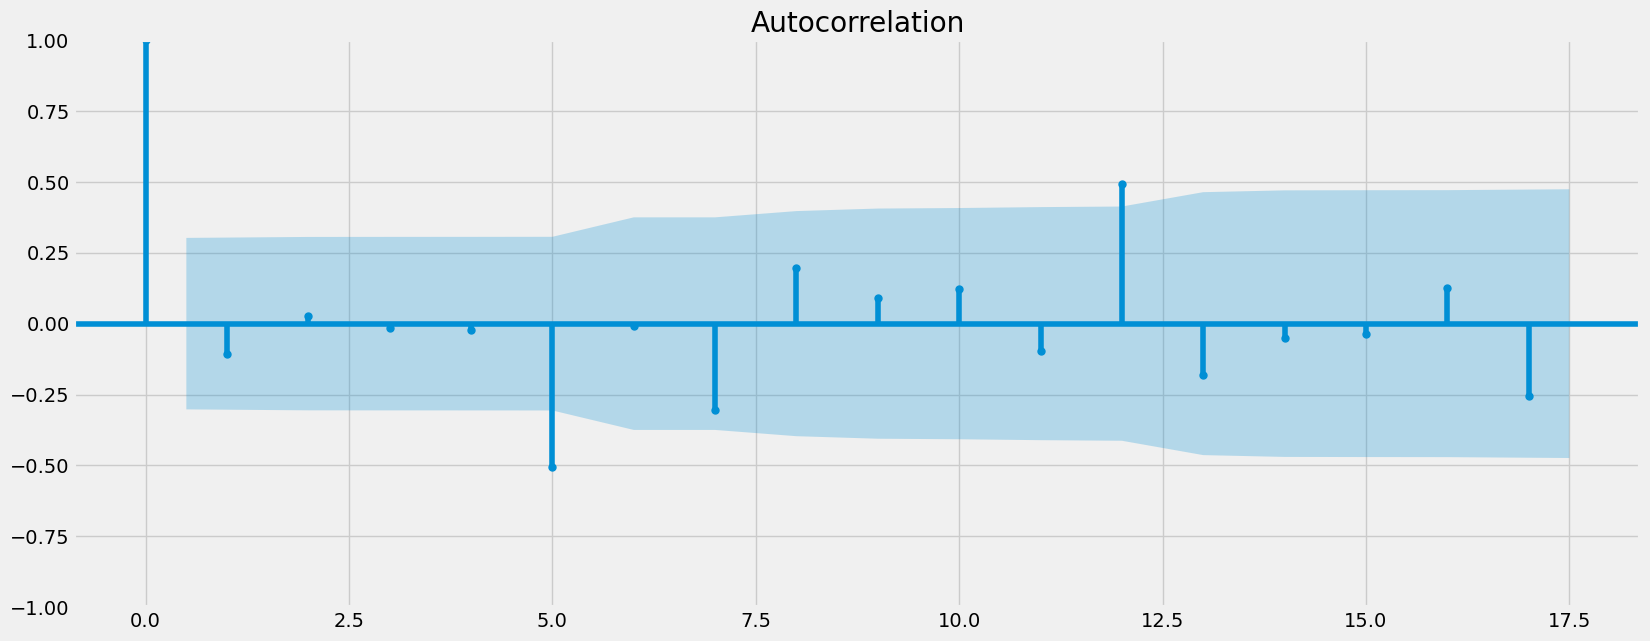

In [39]:
#check autocorrelation
plot_acf(df_diff2)
plt.show()

### Final Analysis
After second round of differentiating, the dickey fuller test showed test statistic less than the critical vlaues of 1%,5% and 10%, which allows us to reject the null hypthosis
Also, the autocorrelation shows only 3 lags above the confidence level, which also shows higher stationarity of the data. 